<a href="https://colab.research.google.com/github/krish-gdp/headers/blob/main/housing_project(advanced_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/data/housing data train.csv')

In [4]:

df_test = pd.read_csv('/content/drive/MyDrive/data/housing data test.csv')

In [5]:
pd.pandas.set_option('display.max_columns',None)

In [6]:
df_train.shape

(1460, 81)

In [7]:
df_test.shape

(1459, 80)

In [8]:
df = pd.concat([df_train,df_test])

In [9]:
df.shape

(2919, 81)

In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
#lets perform data analysis to check if there is any missing values, categorical varaibles, outliers etc.

In [13]:
# MISSING VALUES

In [14]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df_train[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [16]:

#lets find relationship between the missing values and the sale price of the house.

In [17]:
data= df_train.copy()

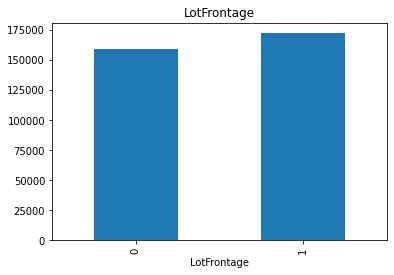

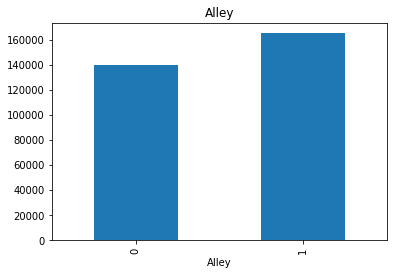

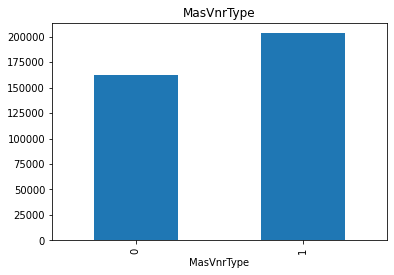

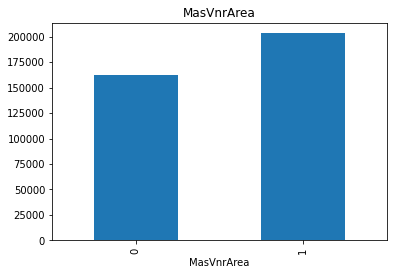

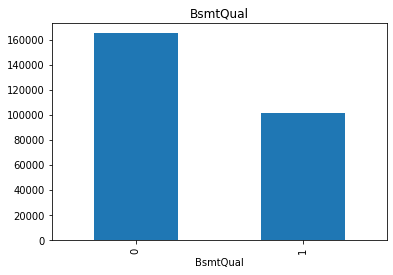

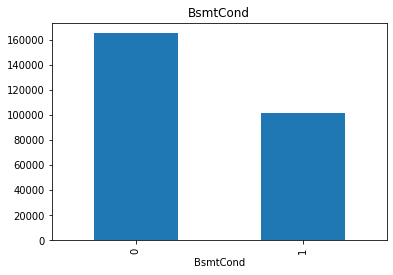

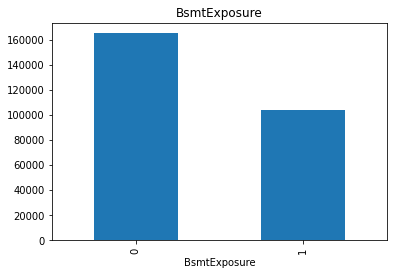

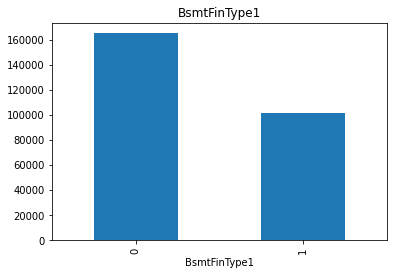

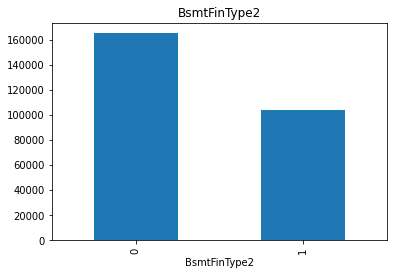

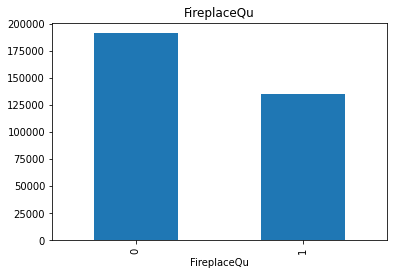

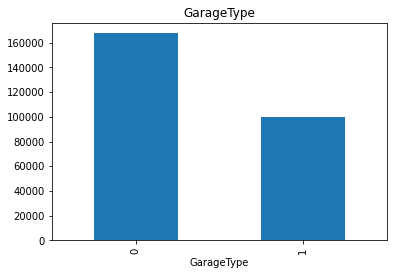

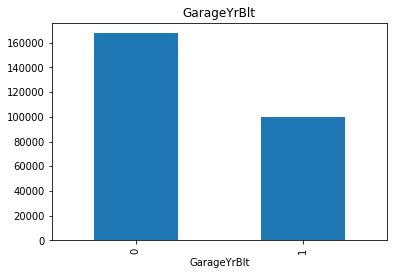

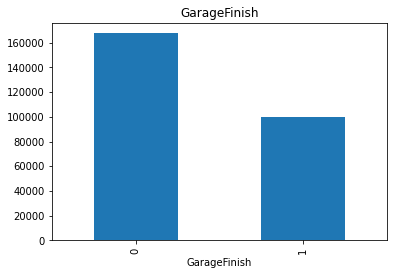

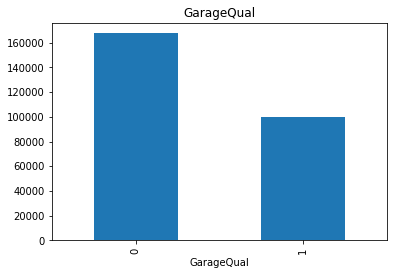

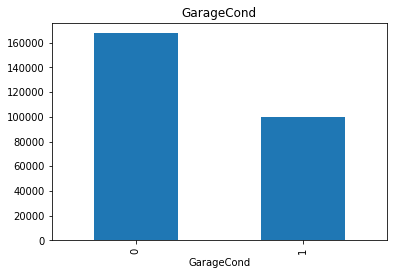

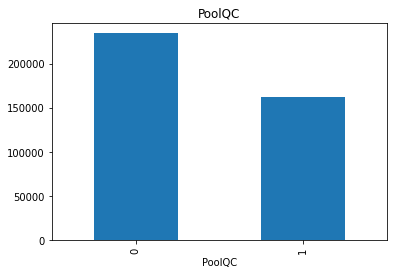

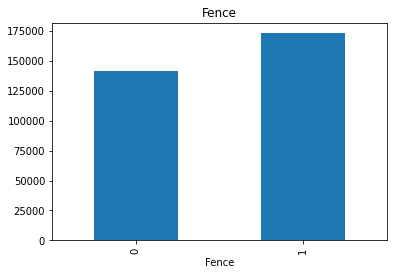

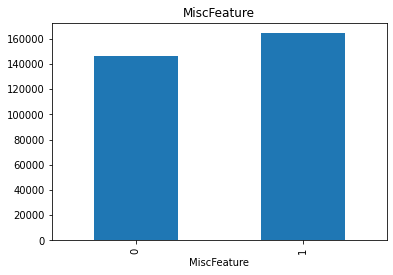

In [18]:
for feature in features_with_na:
  data= df_train.copy()
  data[feature] = np.where(data[feature].isnull(), 1, 0) # this makes if an observation is missing then it becomes 1 otherwise it becomes 0
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()


In [19]:
numerical_cols = [feature for feature in df_train.columns if df_train[feature].dtype != 'O' ]
print("no of numerical columns  =  ",len(numerical_cols))

no of numerical columns  =   38


In [20]:
categorical_cols = [feature for feature in df_train.columns if df_train[feature].dtype =='O' ]
print("no of categorical columns  =  ",len(categorical_cols))

no of categorical columns  =   43


In [21]:
# Some of the features are based on the year.
#lets consider all the features which are based on the year .

In [22]:
year_feature = [feature for feature in numerical_cols if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'sale price(median)')

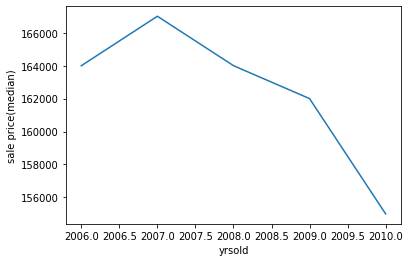

In [23]:
#lets see how the price of the house is varying with the year sold
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('yrsold')
plt.ylabel('sale price(median)')


In [24]:
#here it is clear that house prices are falling as the yr sold is incraesing. But in general it should not be the case. therfore we consider the age of the house.
#similarly for all the features which include the year.

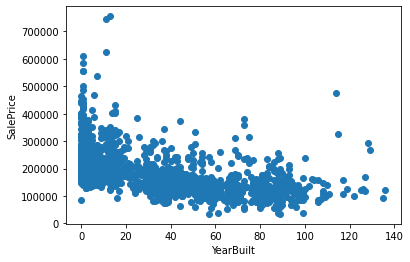

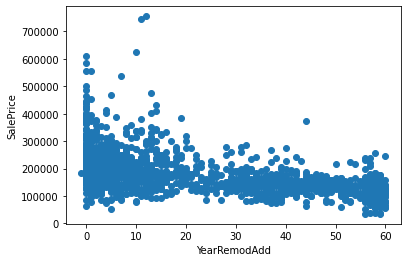

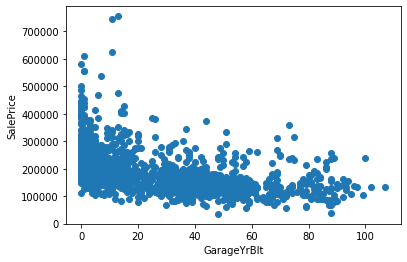

In [25]:
for feature in year_feature:
  if feature != 'YrSold':
    data = df_train.copy()
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [26]:
# Now, its clear thast as the age of the house is increasing or the house is remodeled very back the price of the houses is fall9ng.

In [27]:
#lets consider nuemrical features. they are basically two types. continuous and discrete

In [28]:
discrete_feature=[feature for feature in numerical_cols if len(df_train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [29]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [30]:
df_train[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [31]:
continuous_feature=[feature for feature in numerical_cols if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


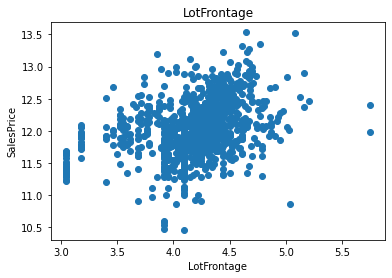

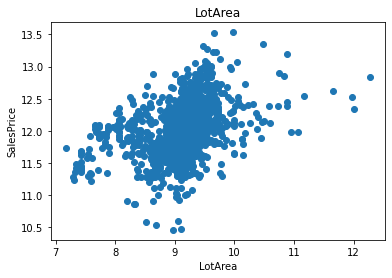

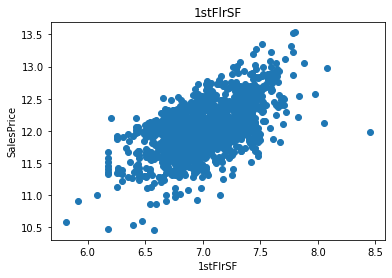

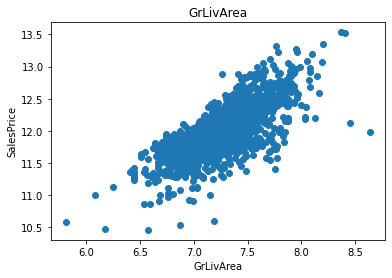

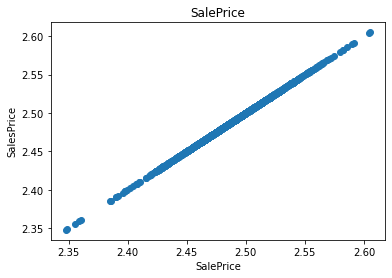

In [32]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

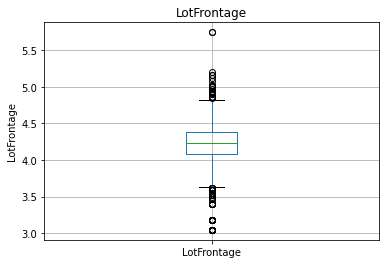

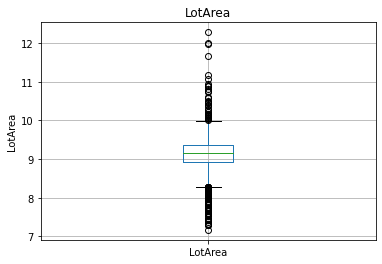

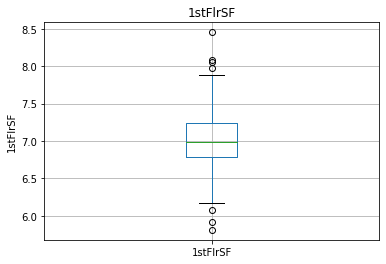

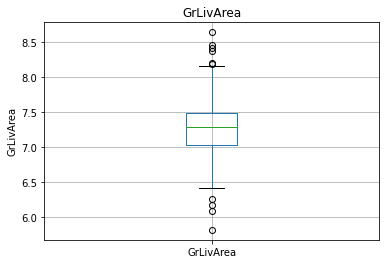

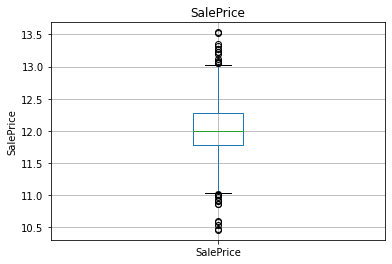

In [33]:
for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [34]:
# as we observe the above box plots, most of the data is  just outliers.

In [35]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [36]:
for feature in categorical_cols:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

In [37]:
# Here, some of the categoricqal columns have more than 10 unique variables.

In [38]:
#Lets perform Feature engineering

In [39]:
#Handling missing values

In [40]:
def replace_cat_feature(data,features_with_na):
    data1=data.copy()
    data1[features_with_na]=data1[features_with_na].fillna('Missing')
    return data1

data=replace_cat_feature(data,features_with_na)

data[features_with_na].isnull().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [41]:
data.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216
5,6,50,RL,85,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,7,20,RL,75,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603
7,8,60,RL,Missing,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073
8,9,50,RM,51,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,11.774520
9,10,190,RL,50,7420,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,

In [42]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:   
  print(data[feature].isna().sum())

0
0
0


In [43]:
data['YearBuilt'] = data['YrSold'] - data['YearBuilt'] 

In [44]:
data['YearRemodAdd'] = data['YrSold'] - data['YearRemodAdd'] 

In [45]:
df = data.drop('GarageYrBlt',axis=1)

In [46]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,85,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,66,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130
1458,1459,20,RL,68,9717,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,60,14,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [47]:

## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

In [48]:
numerical_with_nan

[]

In [49]:
df2 =df

In [50]:
df2['LotFrontage'].fillna(0)

0       65
1       80
2       68
3       60
4       84
        ..
1455    62
1456    85
1457    66
1458    68
1459    75
Name: LotFrontage, Length: 1460, dtype: object

In [51]:
df2.shape

(1460, 80)

In [52]:
df.shape

(1460, 80)

In [53]:
df2.fillna(0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,85,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,66,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130
1458,1459,20,RL,68,9717,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,60,14,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [54]:

df2[['YearBuilt','YearRemodAdd']].head()

,YearBuilt,YearRemodAdd
0,5,5
1,31,31
2,7,6
3,91,36
4,8,8


In [55]:

categorical_features=[feature for feature in df2.columns if df2[feature].dtype=='O']

In [56]:
categorical_features

['MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [57]:
for feature in categorical_features:
    temp=df2.groupby(feature)['SalePrice'].count()/len(df2)
    temp_df=temp[temp>0.01].index
    df2[feature]=np.where(df2[feature].isin(temp_df),df2[feature],'Rare_var')

In [58]:
df2.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Rare_var,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,Rare_var,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,Rare_var,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,Rare_var,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,Missing,9765,Pave,Missing,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,Rare_var,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,680,790,0,1470,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,Missing,Missing,Shed,480,4,2009,WD,Normal,12.128111
96,97,20,RL,78,10264,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,Rare_var,Gd,TA,PConc,Gd,TA,Av,ALQ,1162,Unf,0,426,1588,GasA,Ex,Y,SBrkr,1588,0,0,1588,0,0,2,0,3,1,Gd,6,Typ,0,Missing,Attchd,RFn,2,472,TA,TA,Y,158,29,0,0,0,0,Missing,Missing,Missing,0,8,2006,WD,Normal,12.273731
97,98,20,RL,73,10921,Pave,Missing,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,42,42,Hip,CompShg,HdBoard,HdBoard,BrkFace,Rare_var,TA,TA,CBlock,TA,TA,No,Rec,520,Unf,0,440,960,GasA,TA,Y,FuseF,960,0,0,960,1,0,1,0,3,1,TA,6,Typ,0,Missing,Attchd,Fin,1,432,TA,TA,P,120,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,11.458997
98,99,30,RL,85,10625,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,90,60,Gable,CompShg,Wd Sdng,Wd Sdng,None

In [59]:
for feature in categorical_features:
    labels_ordered=df2.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df2[feature]=df2[feature].map(labels_ordered)

In [60]:
df2.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,11,8450,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,1,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,13,9600,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,7,11250,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,1,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,2,9550,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,20,14260,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,1,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216
5,6,50,3,23,14115,1,2,1,1,1,0,0,9,2,1,3,1,5,5,16,14,0,0,10,10,1,0,1,3,3,3,3,1,6,732,5,0,64,796,2,4,1,3,796,566,0,1362,1,0,1,1,1,1,1,5,4,0,1,4,1,2,480,2,3,2,40,30,0,320,0,0,0,2,1,700,10,2009,2,3,11.870600
6,7,20,3,16,10084,1,2,0,1,1,0,0,18,2,1,3,3,8,5,3,2,0,0,10,10,4,1,2,3,4,4,3,3,6,1369,5,0,317,1686,2,4,1,3,1694,0,0,1694,1,0,2,0,3,1,2,7,4,1,4,4,2,2,636,2,3,2,255,57,0,0,0,0,0,4,2,0,8,2007,2,3,12.634603
7,8,60,3,12,10382,1,2,1,1,1,1,0,12,5,1,3,5,7,6,36,36,0,0,6,5,4,1,1,3,2,3,3,2,4,859,1,32,216,1107,2,4,1,3,1107,983,0,2090,1,0,2,1,3,1,1,7,4,2,3,4,2,2,484,2,3,2,235,204,228,0,0,0,0,4,1,350,11,2009,2,3,12.206073
8,9,50,1,3,6120,1,2,0,1,1,0,0,4,0,1,3,1,7,5,77,58,0,0,8,4,1,0,1,3,1,2,3,1,5,0,5,0,952,952,2,3,1,1,1022,752,0,1774,0,0,2,0,2,2,1,8,3,2,3,2,1,2,468,1,3,2,90,0,205,0,0,0,0,4,2,0,4,2008,2,0,11.774520
9,10,190,3,1,7420,1,2,0,1,1,1,0,3,0,0,0,2,5,6,69,58,0,0,4,3,1,0,1,3,1,2,3,1,6,851,5,0,140,991,2,4,1,3,1077,0,0,1077,1,0,1,0,2,2,1,5,4,2,3,4,2,1,205,3,3,2,0,4,0,0,0,0,0,4,2,0,1,2008,2,3,11.678440


In [61]:

scaling_feature=[feature for feature in df2.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

79

In [62]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,11,8450,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,1,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,13,9600,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,7,11250,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,1,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,2,9550,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,20,14260,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,1,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216


In [63]:
feature_scale=[feature for feature in df2.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df2[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
scaler.transform(df2[feature_scale])

array([[0.23529412, 0.75      , 0.47826087, ..., 0.5       , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.56521739, ..., 0.25      , 0.66666667,
        0.75      ],
       [0.23529412, 0.75      , 0.30434783, ..., 0.5       , 0.66666667,
        0.75      ],
       ...,
       [0.29411765, 0.75      , 0.34782609, ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.30434783, ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.69565217, ..., 0.5       , 0.66666667,
        0.75      ]])

In [65]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df2[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df2[feature_scale]), columns=feature_scale)],
                    axis=1)

In [66]:

data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.478261,0.033420,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,1.0,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75
1,2,12.109011,0.000000,0.75,0.565217,0.038795,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.0,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75
2,3,12.317167,0.235294,0.75,0.304348,0.046507,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,1.0,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75
3,4,11.849398,0.294118,0.75,0.086957,0.038561,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.0,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00
4,5,12.429216,0.235294,0.75,0.869565,0.060576,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,1.0,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75


In [67]:
from sklearn.model_selection import train_test_split
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.33 ,random_state =101)

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
model1 = RandomForestRegressor(criterion='mae',n_estimators = 100)


In [71]:
model1.fit(X_train,y_train)
y_pred= model1.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [73]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [74]:
mae

0.10028192112578582

In [75]:
mse

0.023318456784274945

In [76]:
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,5,7,9,13],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.1,0.2,0.3,0.4]
}

In [77]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [78]:
regressor = xgboost.XGBRegressor()


In [82]:
random_search = RandomizedSearchCV(regressor,param_distributions=params,n_jobs=-1,cv =5,verbose = 3)

In [83]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.9s finished


[11:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [84]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=13, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [85]:
random_search.best_params_

{'gamma': 0.1, 'learning_rate': 0.15, 'max_depth': 13, 'min_child_weight': 1}

In [86]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=13, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [93]:
regressor.fit(X_train,y_train)

[12:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=13, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [94]:
y_pred = regressor.predict(X_test)

In [95]:
mae1 = mean_absolute_error(y_test,y_pred)

In [96]:
mse1 = mean_squared_error(y_test,y_pred)

In [97]:
mae1

0.0964623691249774

In [98]:
mse1

0.020153697725538957